# Julia Tutorial

### Josh Day 
- GitHub: https://github.com/joshday
- email: emailjoshday@gmail.com

<br><br><br><br><br><br>

# Getting Started

How do I do X in Julia?

1. `?X`
2. Official docs
3. Discourse
4. Google

<br><br><br><br><br><br>

# Reading and Writing

Start with `?read` and `?write`

In [1]:
x = randn(10)

writecsv("temp.csv", x)

In [2]:
y = readcsv("temp.csv")

y .== x  # Adding a period means "do elementwise"

10×1 BitArray{2}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

<br><br><br><br><br><br>

# Linear Algebra
- 1-based indexing

In [3]:
x = randn(3, 3)

3×3 Array{Float64,2}:
 -1.5042     0.620847   1.04408 
  0.533774  -1.8785     0.216642
 -0.108727   0.447503  -1.47728 

In [4]:
x[1]

-1.5042042387257744

In [5]:
x[end]

-1.477281220429553

In [6]:
x[1:2, 2:end]

2×2 Array{Float64,2}:
  0.620847  1.04408 
 -1.8785    0.216642

In [7]:
x * rand(3)

3-element Array{Float64,1}:
 -0.369783
  0.30543 
 -0.877027

### Use BLAS directly

In [8]:
using BenchmarkTools
y = zeros(10)
x = ones(10);

In [9]:
@benchmark BLAS.axpy!(0.5, x, y)  # y = 0.5 * x + y

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     40.174 ns (0.00% GC)
  median time:      40.918 ns (0.00% GC)
  mean time:        41.280 ns (0.00% GC)
  maximum time:     73.856 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     991

In [10]:
@benchmark y[:] = 0.5 * x + y

BenchmarkTools.Trial: 
  memory estimate:  320 bytes
  allocs estimate:  2
  --------------
  minimum time:     135.232 ns (0.00% GC)
  median time:      138.624 ns (0.00% GC)
  mean time:        147.881 ns (3.58% GC)
  maximum time:     1.068 μs (78.68% GC)
  --------------
  samples:          10000
  evals/sample:     858

<br><br><br><br><br><br>

# Macros

### Functions of expressions

A macro can change an expression before it gets run.  We've already seen `@time`, etc.

Why does the following need to be a macro?

In [11]:
val = 10
@show val;

val = 10


### Turn off bounds-checking

In [12]:
x = ones(1000)

for i in eachindex(x)
    @inbounds x[i] *= 5.0
end

x[1:5]

5-element Array{Float64,1}:
 5.0
 5.0
 5.0
 5.0
 5.0

<br><br><br><br><br><br>

# Using Packages

- Install with `Pkg.add("SomePackage")`
- Package manager based on git
    - Get unreleased updates with `Pkg.checkout`
- If package is not in METADATA, you need `Pkg.clone`

In [13]:
using Distributions

Normal()

Distributions.Normal{Float64}(μ=0.0, σ=1.0)

<br><br><br><br><br><br>

# Plotting

### Plotting is not built in
- Many options
    - Plots, Gadfly, PyPlot, Winston, UnicodePlots, GR, etc.
- My suggestion is to use Plots with the GR backend

In [14]:
using Plots  # GR backend is default

In [15]:
plot(randn(100, 2))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 29.2591,171.569 34.8254,117.669 40.3916,72.3597 45.9578,166.263 51.524,278.871 57.0902,104.926 62.6565,120.702 68.2227,293.883 73.7889,77.2302 79.3551,70.4123 
 84.9213,203.325 90.4876,195.237 96.0538,235.45 101.62,236.281 107.186,264.896 112.752,194.029 118.319,197.345 123.885,114.62 129.451,283.242 135.017,117.126 
 140.584,212.088 146.15,190.312 151.716,206.521 157.282,168.718 162.848,160.508 168.415,148.88 173.981,161.815 179.547,41.9145 185.113,129.251 190.68,120.419 
 196.246,226.167 201.812,127.964 207.378,192.232 212.944,188.847 218.511,39.0899 224.077,95.8908 229.643,147.203 235.209,146.424 240.776,51.846 246.342,95.0447 
 251.908,149.092 257.474,168.643 263.04,129.405 268.607,155.865 274.173,160.159 279.739,211.729 285.305,23.2496 290.872,215.629 296.438,63.7272 302.004,208.328 
 307.57,71.1542 313.136,109.686 318.703,123.646 324.269,140.447 329.835,150.512 335.401,159.4 340.967,194.976 346.534,141.825 352.1,125.362 357.666,150.971 
 363.232,145.174 368.799,143.3 374.365,111.405 379.931,229.442 385.497,225.545 391.063,167.848 396.63,103.596 402.196,133.035 407.762,116.359 413.328,183.525 
 418.895,151.917 424.461,177.4 430.027,136.371 435.593,106.925 441.159,130.797 446.726,188.487 452.292,162.361 457.858,236.392 463.424,235.381 468.991,161.172 
 474.557,11.9913 480.123,41.4405 485.689,155.723 491.255,165.771 496.822,273.103 502.388,215.623 507.954,137.232 513.52,158.774 519.087,184.731 524.653,273.182 
 530.219,183.933 535.785,208.041 541.351,94.8501 546.918,242.375 552.484,179.651 558.05,21.4459 563.616,140.245 569.183,155.188 574.749,234.76 580.315,149.018 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 29.2591,320.984 34.8254,240.794 40.3916,26.8996 45.9578,141.181 51.524,190.639 57.0902,89.1591 62.6565,89.1721 68.2227,21.8204 73.7889,224.024 79.3551,227.075 
 84.9213,105.756 90.4876,154.159 96.0538,168.473 101.62,15.0124 107.186,17.5528 112.752,274.096 118.319,235.159 123.885,115.783 129.451,89.2563 135.017,46.7065 
 140.584,157.128 146.15,196.566 151.716,131.299 157.282,222.77 162.848,189.29 168.415,227.098 173.981,42.5361 179.547,99.3653 185.113,210.168 190.68,106.01 
 196.246,109.7 201.812,164.893 207.378,200.917 212.944,76.7729 218.511,98.6667 224.077,270.087 229.643,171.915 235.209,206.12 240.776,172.924 246.342,189.274 
 251.908,72.2768 257.474,67.6506 263.04,215.69 268.607,129.172 274.173,130.131 279.739,155.172 285.305,146.803 290.872,73.9077 296.438,152.531 302.004,174.817 
 307.57,47.4246 313.136,176.678 318.703,120.064 324.269,223.06 329.835,239.199 335.401,11.811 340.967,176.23 346.534,344.306 352.1,174.455 357.666,168.622 
 363.232,221.114 368.799,194.595 374.365,159.209 379.931,97.7831 385.497,209.665 391.063,37.3268 396.63,58.4267 402.196,129.88 407.762,216.738 413.328,51.1896 
 418.895,272.242 424.461,51.5386 430.027,231.837 435.593,148.268 441.159,46.7964 446.726,375.813 452.292,181.873 457.858,187.283 463.424,104.718 468.991,142.689 
 474.557,246.391 480.123,64.6888 485.689,137.579 491.255,66.7637 496.822,97.3919 502.388,232.5 507.954,130.449 513.52,148.158 519.087,193.38 524.653,53.3042 
 530.219,109.12 535.785,137.94 541.351,132.643 546.918,172.412 552.484,143.253 558.05,148.49 563.616,82.6059 569.183,86.6676 574.749,216.904 580.315,206.443 
 
 "/>
 
 
 
 
 y1 
 
 
 
 y2

### "Magic" arguments
- Even short plotting commands can do a lot
- consider `marker = (:auto, 3, .2)`
    - `:auto`: give each series a different marker
    - `3`: use a marker size of 3
    - `.2`: use an alpha (opacity) of .2

In [16]:
x = cumsum(randn(100, 4))
plt = plot(x, marker = (:auto, 3, .2))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 -15 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 51.2582,196.859 56.4465,204.712 61.6349,200.397 66.8233,196.226 72.0116,201.093 77.2,194.682 82.3883,190.626 87.5767,184.86 92.765,174.067 97.9534,183.507 
 103.142,202.891 108.33,216.943 113.518,218.49 118.707,213.265 123.895,210.856 129.084,205.16 134.272,194.429 139.46,179.104 144.649,173.025 149.837,182.323 
 155.025,190.302 160.214,187.568 165.402,197.633 170.59,183.922 175.779,183.016 180.967,190.237 186.155,180.546 191.344,192.819 196.532,190.199 201.721,174.831 
 206.909,188.235 212.097,180.394 217.286,181.449 222.474,166.108 227.662,166.414 232.851,176.02 238.039,182.22 243.227,170.673 248.416,155.827 253.604,143.518 
 258.792,142.304 263.981,151.91 269.169,157.66 274.358,151.979 279.546,141.71 284.734,147.06 289.923,156.587 295.111,138.523 300.299,119.905 305.488,119.198 
 310.676,122.304 315.864,117.378 321.053,125.918 326.241,136.963 331.429,136.094 336.618,139.177 341.806,151.376 346.995,154.03 352.183,138.287 357.371,136.153 
 362.56,143.04 367.748,147.095 372.936,162.701 378.125,168.823 383.313,181.452 388.501,192.841 393.69,207.796 398.878,195.666 404.066,198.224 409.255,189.038 
 414.443,188.707 419.632,187.175 424.82,166.994 430.008,155.36 435.197,119.754 440.385,111.426 445.573,134.289 450.762,129.571 455.95,123.584 461.138,132.727 
 466.327,122.373 471.515,138.304 476.703,143.688 481.892,142.262 487.08,122.95 492.269,125.469 497.457,119.108 502.645,115.489 507.834,123.037 513.022,138.07 
 518.21,144.568 523.399,150.847 528.587,155.143 533.775,161.612 538.964,153.561 544.152,136.968 549.34,132.29 554.529,120.303 559.717,112.925 564.906,104.816 
 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 51.2582,182.422 56.4465,183.161 61.6349,197.871 66.8233,208.723 72.0116,188.8 77.2,183.996 82.3883,218.075 87.5767,227.875 92.765,237.033 97.9534,233.523 
 103.142,235.362 108.33,227.207 113.518,217.728 118.707,188.058 123.895,190.233 129.084,196.025 134.272,214.04 139.46,230.438 144.649,220.695 149.837,219.916 
 155.025,219.678 160.214,217.372 165.402,223.578 170.59,206.454 175.779,208.206 180.967,197.837 186.155,197.194 191.344,202.848 196.532,215.243 201.721,206.309 
 206.909,203.165 212.097,202.095 217.286,194.278 222.474,168.935 227.662,171.879 232.851,176.902 238.039,181.55 243.227,188.018 248.416,196.151 253.604,193.504 
 258.792,199.418 263.981,201.678 269.169,213.095 274.358,226.409 279.546,229.87 284.734,233.973 289.923,212.015 295.111,224.826 300.299,223.178 305.488,222.867 
 310.676,236.22 315.864,236.9 321.053,238.208 326.241,230.503 331.429,225.132 336.618,216.455 341.806,217.908 346.995,211.645 352.183,216.054 357.371,190.31 
 362.56,178.334 367.748,191.775 372.936,196.436 378.125,189.136 383.313,172.079 388.501,178.324 393.69,182.11 398.878,186.044 404.066,193.215 409.255,204.451 
 414.443,210.846 419.632,214.04 424.82,202.534 430.008,195.16 435.197,193.639 440.385,200.671 445.573,180.527 450.762,170.215 455.95,174.138 461.138,163.88 
 466.327,165.504 471.515,144.725 476.703,139.191 481.892,145.666 487.08,144.388 492.269,144.497 497.457,135.442 502.645,131.353 507.834,133.142 513.022,150.09 
 518.21,141.265 523.399,159.836 528.587,154.829 533.775,157.941 538.964,147.569 544.152,144.053 549.34,146.612 

### Mutate Plots

- Since Julia passes arguments by reference, a function can change the argument in place
- By convention, *mutating* functions end in `!` and mutate at least the first argument

In [17]:
plot!(plt, x -> 10*sin(x), line = (3, :dot, .2), label = "new thing", fill = (0, .2))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 -15 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 65.5019,196.859 70.4034,204.712 75.305,200.397 80.2066,196.226 85.1081,201.093 90.0097,194.682 94.9112,190.626 99.8128,184.86 104.714,174.067 109.616,183.507 
 114.517,202.891 119.419,216.943 124.321,218.49 129.222,213.265 134.124,210.856 139.025,205.16 143.927,194.429 148.828,179.104 153.73,173.025 158.632,182.323 
 163.533,190.302 168.435,187.568 173.336,197.633 178.238,183.922 183.139,183.016 188.041,190.237 192.942,180.546 197.844,192.819 202.746,190.199 207.647,174.831 
 212.549,188.235 217.45,180.394 222.352,181.449 227.253,166.108 232.155,166.414 237.057,176.02 241.958,182.22 246.86,170.673 251.761,155.827 256.663,143.518 
 261.564,142.304 266.466,151.91 271.367,157.66 276.269,151.979 281.171,141.71 286.072,147.06 290.974,156.587 295.875,138.523 300.777,119.905 305.678,119.198 
 310.58,122.304 315.482,117.378 320.383,125.918 325.285,136.963 330.186,136.094 335.088,139.177 339.989,151.376 344.891,154.03 349.792,138.287 354.694,136.153 
 359.596,143.04 364.497,147.095 369.399,162.701 374.3,168.823 379.202,181.452 384.103,192.841 389.005,207.796 393.907,195.666 398.808,198.224 403.71,189.038 
 408.611,188.707 413.513,187.175 418.414,166.994 423.316,155.36 428.217,119.754 433.119,111.426 438.021,134.289 442.922,129.571 447.824,123.584 452.725,132.727 
 457.627,122.373 462.528,138.304 467.43,143.688 472.331,142.262 477.233,122.95 482.135,125.469 487.036,119.108 491.938,115.489 496.839,123.037 501.741,138.07 
 506.642,144.568 511.544,150.847 516.446,155.143 521.347,161.612 526.249,153.561 531.15,136.968 536.052,132.29 540.953,120.303 545.855,112.925 550.756,104.816 
 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 65.5019,182.422 70.4034,183.161 75.305,197.871 80.2066,208.723 85.1081,188.8 90.0097,183.996 94.9112,218.075 99.8128,227.875 104.714,237.033 109.616,233.523 
 114.517,235.362 119.419,227.207 124.321,217.728 129.222,188.058 134.124,190.233 139.025,196.025 143.927,214.04 148.828,230.438 153.73,220.695 158.632,219.916 
 163.533,219.678 168.435,217.372 173.336,223.578 178.238,206.454 183.139,208.206 188.041,197.837 192.942,197.194 197.844,202.848 202.746,215.243 207.647,206.309 
 212.549,203.165 217.45,202.095 222.352,194.278 227.253,168.935 232.155,171.879 237.057,176.902 241.958,181.55 246.86,188.018 251.761,196.151 256.663,193.504 
 261.564,199.418 266.466,201.678 271.367,213.095 276.269,226.409 281.171,229.87 286.072,233.973 290.974,212.015 295.875,224.826 300.777,223.178 305.678,222.867 
 310.58,236.22 315.482,236.9 320.383,238.208 325.285,230.503 330.186,225.132 335.088,216.455 339.989,217.908 344.891,211.645 349.792,216.054 354.694,190.31 
 359.596,178.334 364.497,191.775 369.399,196.436 374.3,189.136 379.202,172.079 384.103,178.324 389.005,182.11 393.907,186.044 398.808,193.215 403.71,204.451 
 408.611,210.846 413.513,214.04 418.414,202.534 423.316,195.16 428.217,193.639 433.119,200.671 438.021,180.527 442.922,170.215 447.824,174.138 452.725,163.88 
 457.627,165.504 462.528,144.725 467.43,139.191 472.331,145.666 477.233,144.388 482.135,144.497 487.036,135.442 491.938,131.353 496.839,133.142 501.741,150.09 
 506.642,141.265 511.544,159.836 516.446,154.829 521.347,157.941 526.249,147.569 531.15,144.053 536.052,

### Plot Recipes

- Create your own plot methods

In [18]:
using RecipesBase

struct NewType end

@recipe function f(o::NewType)
    ylim --> (0, 1)
    label --> "this is a NewType"
    color --> "red"
    rand(100)
end
    
plot(NewType())

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#ff0000; stroke-width:1; stroke-opacity:1; fill:none" points="
 32.2221,322.479 37.7584,264.215 43.2947,320.822 48.831,211.077 54.3673,206.424 59.9036,322.137 65.4399,202.449 70.9761,187.753 76.5124,156.636 82.0487,214.55 
 87.585,244.365 93.1213,88.682 98.6576,100.343 104.194,184.297 109.73,96.5497 115.266,78.8713 120.803,166.342 126.339,175.447 131.875,166.982 137.412,94.0561 
 142.948,340.685 148.484,337.797 154.021,247.5 159.557,291.071 165.093,119.12 170.629,249.862 176.166,305.427 181.702,318.172 187.238,338.262 192.775,244.724 
 198.311,348.447 203.847,289.786 209.383,209.134 214.92,222.313 220.456,242.474 225.992,203.305 231.529,85.26 237.065,341.162 242.601,240.575 248.137,179.87 
 253.674,148.688 259.21,132.798 264.746,342.945 270.283,148.581 275.819,66.7171 281.355,300.153 286.892,258.581 292.428,60.9338 297.964,61.2645 303.5,151.422 
 309.037,234.755 314.573,342.188 320.109,321.437 325.646,158.145 331.182,319.998 336.718,164.244 342.254,102.461 347.791,94.8921 353.327,26.6197 358.863,359.5 
 364.4,26.4389 369.936,198.047 375.472,253.952 381.008,68.6804 386.545,59.0301 392.081,198.094 397.617,276.817 403.154,114.989 408.69,21.7392 414.226,91.9005 
 419.763,283.339 425.299,26.824 430.835,299.909 436.371,68.3434 441.908,204.021 447.444,221.453 452.98,202.942 458.517,367.156 464.053,238.384 469.589,182.676 
 475.125,85.3216 480.662,336.061 486.198,271.13 491.734,206.892 497.271,305.738 502.807,28.5233 508.343,236.542 513.879,288.717 519.416,62.0776 524.952,197.298 
 530.488,314.738 536.025,99.2545 541.561,147.256 547.097,117.516 552.634,111.527 558.17,257.939 563.706,129.684 569.242,125.701 574.779,336.1 580.315,94.7548 
 
 "/>
 
 
 
 
 this is a NewType

In [19]:
using AverageShiftedHistograms, Distributions

x = rand(Gamma(5, 1), 1_000_000)

a = ash(x; rng = 0:.1:20)

Ash
  > edges  | 0.0 : 0.1 : 20.0
  > kernel | AverageShiftedHistograms.Kernels.biweight
  > m      | 5
  > nobs   | 1000000
       ┌────────────────────────────────────────┐ 
   0.2 │⠀⠀⠀⠀⠀⠀⠀⡴⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⡜⠀⠀⢱⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⢣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⡜⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⠀⠀⢇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⡜⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⢰⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⢇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⡸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⡸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⢀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
     0 │⣀⡜⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠓⠦⠤⢄⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀│ 
       └────────────────────────────────────────┘ 
       0

In [20]:
plot(a)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:2; stroke-opacity:1; fill:none" points="
 38.8117,375.745 41.5193,375.596 44.2268,375.233 46.9343,374.477 49.6418,373.164 52.3493,371.105 55.0568,368.149 57.7643,364.175 60.4719,359.068 63.1794,352.726 
 65.8869,345.103 68.5944,336.098 71.3019,325.635 74.0094,313.809 76.717,300.779 79.4245,286.79 82.132,272.083 84.8395,256.816 87.547,241.135 90.2545,225.149 
 92.9621,209.035 95.6696,192.89 98.3771,176.87 101.085,161.225 103.792,146.03 106.5,131.242 109.207,116.871 111.915,103.116 114.622,90.2237 117.33,78.3287 
 120.037,67.4099 122.745,57.5742 125.452,49.0527 128.16,41.8607 130.867,35.7929 133.575,30.5764 136.282,26.1378 138.99,22.4692 141.697,19.4604 144.405,17.2265 
 147.112,15.9377 149.82,15.6802 152.527,16.586 155.235,18.5574 157.942,21.3315 160.65,24.8949 163.357,29.2287 166.065,34.3082 168.773,40.103 171.48,46.3608 
 174.188,52.8588 176.895,59.5862 179.603,66.491 182.31,73.4951 185.018,80.571 187.725,87.821 190.433,95.26 193.14,102.927 195.848,110.784 198.555,118.747 
 201.263,126.917 203.97,135.276 206.678,143.721 209.385,152.243 212.093,160.778 214.8,169.092 217.508,177.099 220.215,184.774 222.923,192.07 225.63,199.213 
 228.338,206.297 231.045,213.413 233.753,220.665 236.46,227.904 239.168,234.898 241.875,241.552 244.583,247.798 247.29,253.597 249.998,259.162 252.706,264.69 
 255.413,270.164 258.121,275.432 260.828,280.419 263.536,285.177 266.243,289.801 268.951,294.259 271.658,298.487 274.366,302.577 277.073,306.53 279.781,310.178 
 282.488,313.472 285.196,316.521 287.903,319.462 290.611,322.344 293.318,325.14 296.026,327.859 298.733,330.571 301.441,333.248 304.148,335.799 306.856,338.159 
 309.563,340.304 312.271,342.261 314.978,344.123 317.686,345.963 320.393,347.774 323.101,349.51 325.808,351.141 328.516,352.625 331.223,353.963 333.931,355.22 
 336.639,356.478 339.346,357.793 342.054,359.109 344.761,360.333 347.469,361.418 350.176,362.361 352.884,363.177 355.591,363.878 358.299,364.52 361.006,365.135 
 363.714,365.724 366.421,366.305 369.129,366.901 371.836,367.52 374.544,368.108 377.251,368.637 379.959,369.12 382.666,369.571 385.374,369.986 388.081,370.365 
 390.789,370.732 393.496,371.11 396.204,371.491 398.911,371.834 401.619,372.127 404.326,372.38 407.034,372.595 409.741,372.784 412.449,372.962 415.156,373.149 
 417.864,373.367 420.572,373.6 423.279,373.804 425.987,373.959 428.694,374.073 431.402,374.162 434.109,374.246 436.817,374.336 439.524,374.432 442.232,374.538 
 444.939,374.635 447.647,374.711 450.354,374.775 453.062,374.837 455.769,374.901 458.477,374.967 461.184,375.036 463.892,375.101 466.599,375.158 469.307,375.208 
 472.014,375.249 474.722,375.282 477.429,375.307 480.137,375.33 482.844,375.352 485.552,375.379 488.259,375.41 490.967,375.444 493.674,375.48 496.382,375.514 
 499.089,375.543 501.797,375.567 504.505,375.586 507.212,375.605 509.92,375.624 512.627,375.645 515.335,375.665 518.042,375.682 520.75,375.693 523.457,375.698 
 526.165,375.698 528.872,375.694 531.58,375.692 534.287,375.695 536.995,375.704 539.702,375.713 542.41,375.723 545.117,375.734 547.825,375.743 550.532,375.75 
 553.24,375.755 555.947,375.761 558.655,375.767 561.362,375.773 564.07,375.776 566.777,375.779 569.485,375.781 572.192,375.783 574.9,375.784 577.607,375.788 
 580.315,375.793 
 "/>
 
 
 
 
 Histogram Density 
 
 
 
 Ash Density

In [21]:
plot!(x -> pdf(Gamma(5,1), x), label = "true density", fill = (0, .3))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:2; stroke-opacity:1; fill:none" points="
 38.8117,375.745 41.5193,375.596 44.2268,375.233 46.9343,374.477 49.6418,373.164 52.3493,371.105 55.0568,368.149 57.7643,364.175 60.4719,359.068 63.1794,352.726 
 65.8869,345.103 68.5944,336.098 71.3019,325.635 74.0094,313.809 76.717,300.779 79.4245,286.79 82.132,272.083 84.8395,256.816 87.547,241.135 90.2545,225.149 
 92.9621,209.035 95.6696,192.89 98.3771,176.87 101.085,161.225 103.792,146.03 106.5,131.242 109.207,116.871 111.915,103.116 114.622,90.2237 117.33,78.3287 
 120.037,67.4099 122.745,57.5742 125.452,49.0527 128.16,41.8607 130.867,35.7929 133.575,30.5764 136.282,26.1378 138.99,22.4692 141.697,19.4604 144.405,17.2265 
 147.112,15.9377 149.82,15.6802 152.527,16.586 155.235,18.5574 157.942,21.3315 160.65,24.8949 163.357,29.2287 166.065,34.3082 168.773,40.103 171.48,46.3608 
 174.188,52.8588 176.895,59.5862 179.603,66.491 182.31,73.4951 185.018,80.571 187.725,87.821 190.433,95.26 193.14,102.927 195.848,110.784 198.555,118.747 
 201.263,126.917 203.97,135.276 206.678,143.721 209.385,152.243 212.093,160.778 214.8,169.092 217.508,177.099 220.215,184.774 222.923,192.07 225.63,199.213 
 228.338,206.297 231.045,213.413 233.753,220.665 236.46,227.904 239.168,234.898 241.875,241.552 244.583,247.798 247.29,253.597 249.998,259.162 252.706,264.69 
 255.413,270.164 258.121,275.432 260.828,280.419 263.536,285.177 266.243,289.801 268.951,294.259 271.658,298.487 274.366,302.577 277.073,306.53 279.781,310.178 
 282.488,313.472 285.196,316.521 287.903,319.462 290.611,322.344 293.318,325.14 296.026,327.859 298.733,330.571 301.441,333.248 304.148,335.799 306.856,338.159 
 309.563,340.304 312.271,342.261 314.978,344.123 317.686,345.963 320.393,347.774 323.101,349.51 325.808,351.141 328.516,352.625 331.223,353.963 333.931,355.22 
 336.639,356.478 339.346,357.793 342.054,359.109 344.761,360.333 347.469,361.418 350.176,362.361 352.884,363.177 355.591,363.878 358.299,364.52 361.006,365.135 
 363.714,365.724 366.421,366.305 369.129,366.901 371.836,367.52 374.544,368.108 377.251,368.637 379.959,369.12 382.666,369.571 385.374,369.986 388.081,370.365 
 390.789,370.732 393.496,371.11 396.204,371.491 398.911,371.834 401.619,372.127 404.326,372.38 407.034,372.595 409.741,372.784 412.449,372.962 415.156,373.149 
 417.864,373.367 420.572,373.6 423.279,373.804 425.987,373.959 428.694,374.073 431.402,374.162 434.109,374.246 436.817,374.336 439.524,374.432 442.232,374.538 
 444.939,374.635 447.647,374.711 450.354,374.775 453.062,374.837 455.769,374.901 458.477,374.967 461.184,375.036 463.892,375.101 466.599,375.158 469.307,375.208 
 472.014,375.249 474.722,375.282 477.429,375.307 480.137,375.33 482.844,375.352 485.552,375.379 488.259,375.41 490.967,375.444 493.674,375.48 496.382,375.514 
 499.089,375.543 501.797,375.567 504.505,375.586 507.212,375.605 509.92,375.624 512.627,375.645 515.335,375.665 518.042,375.682 520.75,375.693 523.457,375.698 
 526.165,375.698 528.872,375.694 531.58,375.692 534.287,375.695 536.995,375.704 539.702,375.713 542.41,375.723 545.117,375.734 547.825,375.743 550.532,375.75 
 553.24,375.755 555.947,375.761 558.655,375.767 561.362,375.773 564.07,375.776 566.777,375.779 569.485,375.781 572.192,375.783 574.9,375.784 577.607,375.788 
 580.315,375.793 
 "/>
<polygon clip-path="url(#clip02)" points="
40.1338,375.813 41.4558,375.807 4

<br><br><br><br><br><br>

# Making New Types

### Julia is written in Julia
Your own types are just as powerful as those built into base Julia

### The three basic types in Julia are `abstract type`, `struct`, and `mutable struct`
- `abstract type`
    - Defines a set of types.  Doesn't actually "exist"
- `struct`
    - A collection of things that stay the same  
- `mutable struct`
    - A collection of things which may change
    

### Workflow
A struct has guarantees a mutable struct doesn't have which allows Julia to make better optimizations in many cases
- Start with `struct`
- If you hit an immutability error, use `mutable struct`

In [23]:
abstract type SumIsOne end
sum(::SumIsOne) = 1

sum (generic function with 1 method)

In [24]:
struct MyNewType <: SumIsOne
    a::Float64
    b::Vector{Int}
end

t = MyNewType(1.5, ones(Int, 5))

MyNewType(1.5, [1, 1, 1, 1, 1])

In [25]:
sum(t)

1

In [26]:
t.a

1.5

In [27]:
t.b

5-element Array{Int64,1}:
 1
 1
 1
 1
 1

In [28]:
# I can't change something that I've already said won't change
t.a = 100.0

LoadError: [91mtype MyNewType is immutable[39m

In [29]:
# Why isn't this an error?
t.b[3] = 100

100

<br><br><br><br><br><br>

# Using R with Julia

In [30]:
using RCall

  likely near In[30]:1
  likely near In[30]:1


In [43]:
x = randn(1000);

In [32]:
# Using R's sum function on a vector inside my Julia process
y = R"sum($x)"

RCall.RObject{RCall.RealSxp}
[1] 31.557


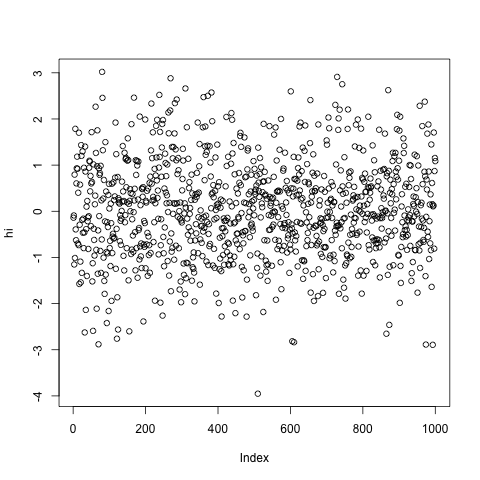

RCall.RObject{RCall.NilSxp}
NULL


In [33]:
# Use R's built-in plottingb
R"""
plot($x, ylab = "hi")
"""

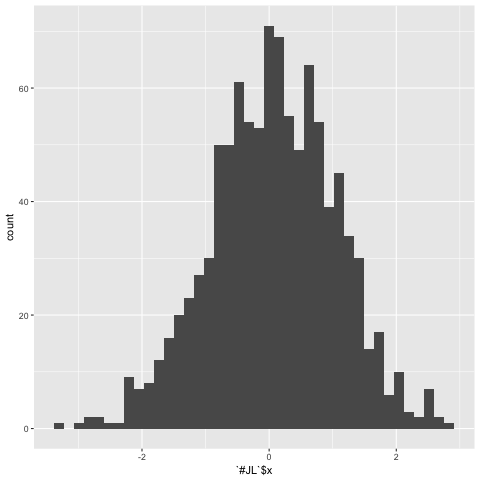

RCall.RObject{RCall.VecSxp}


In [45]:
# Even use ggplot
R"""
library(ggplot2)
qplot($x, bins=40)
"""

<br><br><br><br><br><br>

# Statistics (Do R things in Julia)

- StatsBase (common statistical functions)
- GLM (generalized linear models)
- DataFrames (tabular data with missing values)

### StatsBase

In [35]:
using StatsBase

In [36]:
sample(1:100, 5, replace=true)

5-element Array{Int64,1}:
 10
 24
 16
 65
 89

In [37]:
mean(randn(100), AnalyticWeights(rand(100)))

0.021626539852364148

### GLM

In [38]:
using GLM
x = randn(100, 5)
y = x * randn(5) + randn(100)

lm(x, y)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] ccdf(::Distributions.FDist{Float64}, ::Array{Float64,

GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}:

Coefficients:
      Estimate Std.Error  t value Pr(>|t|)
x1     1.06632 0.0935926  11.3932   <1e-18
x2    0.806404  0.106406  7.57853   <1e-10
x3   0.0654122 0.0838227 0.780364   0.4371
x4   -0.495911 0.0891321 -5.56377    <1e-6
x5   -0.700925  0.102655 -6.82793    <1e-9



1}) at ./deprecated.jl:57
 [3] coeftable(::GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}) at /Users/joshday/.julia/v0.6/GLM/src/lm.jl:154
 [4] show(::IOContext{Base.AbstractIOBuffer{Array{UInt8,1}}}, ::GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}) at /Users/joshday/.julia/v0.6/GLM/src/linpred.jl:133
 [5] limitstringmime(::MIME{Symbol("text/plain")}, ::GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}) at /Users/joshday/.julia/v0.6/IJulia/src/inline.jl:24
 [6] display_dict(::GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}) at /Users/joshday/.julia/v0.6/IJulia/src/execute_request.jl:27
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/joshday/.julia/v0.6/IJulia/src/execute_request.jl:182
 [8] 

# DataFrames

### Missing data is a hard problem in a compiled language

- Consider `x = 5`
    - Great, the compiler knows `x` is an `Int`.
- Consider `x = 5` OR `x` is Null (in the statistical sense)
    -  Tricky.  Two ways of dealing with this:
        - `typeof(x) == Union{Int, Null}`
        - `typeof(x) == Nullable{Int}`
    - There isn't a clear null value representation winner yet (hence DataFrames and DataTables)

In [39]:
using DataFrames

In [40]:
df = DataFrame(x = randn(100), y = rand(Bool, 100))
head(df)

,x,y
1,0.7376109145605482,false
2,0.2579328680818998,true
3,-0.3072094937134795,true
4,-1.078782581888939,true
5,-0.5909876490952743,true
6,0.4232525248908165,false


In [41]:
using Query

df2 = @from i in df begin
    @where i.y == true && i.x > 0
    @select i
    @collect DataFrame
end
head(df2)

,x,y
1,0.2579328680818998,true
2,0.4625661797987931,true
3,0.05160812171812169,true
4,0.26323199931879016,true
5,0.24474500047806988,true
6,1.2958595868409513,true
